In [1]:
"""
importing numpy and matplotlib libery:
"""
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import interpolate

In [2]:
import Maze as m
import Cspace as c

In [3]:
Obj1 = m.maze.obj1(5,10,-7)       #rhombus having sides=5
Obj2 = m.maze.obj2(3,7,5)         #tringle having hight=3
Obj3 = m.maze.obj3(3,-10,-1)        #oval minor axis=3

L1,L2 = m.maze.links(a=7,b=5)     #links of the robot manipulators
Link1 = L1
Link2 = L1[-1]+L2

pt1 = np.array([ 6, -1])
pt2 = np.array([-3 , -1])

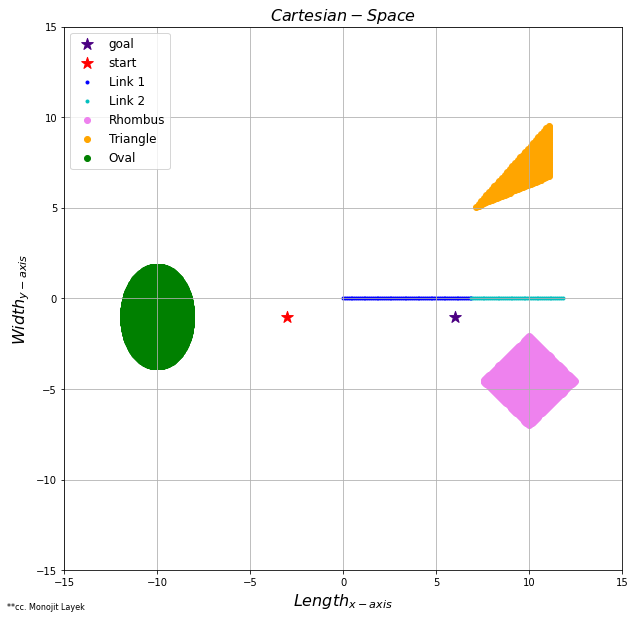

In [4]:
'''
Inserting all the three objects and links into the Maze:
'''
fig = m.maze.getFigure(10,10)
plt.scatter(pt1.T[0],pt1.T[1], c="indigo", alpha=1, marker=r'*', s=150, label='goal')   #ploting link1 of the robot
plt.scatter(pt2.T[0],pt2.T[1], c="red", alpha=1, marker=r'*', s=150, label='start')   #ploting link1 of the robot
plt.scatter(Link1.T[0],Link1.T[1], c="b", alpha=1, marker=r'.', label='Link 1')   #ploting link1 of the robot
plt.scatter(Link2.T[0],Link2.T[1], c="c", alpha=1, marker=r'.', label='Link 2')    #ploting link2 of the robot
plt.scatter(Obj1[:,0],Obj1[:,1],c="violet", alpha=1, marker=r'o',label='Rhombus')      #ploting rhombus object
plt.scatter(Obj2[:,0],Obj2[:,1],c="orange", alpha=1, marker=r'o',label='Triangle')   #ploting the tringle object
plt.scatter(Obj3[:,0],Obj3[:,1],c="green", alpha=1, marker=r'o',label='Oval')         #ploting the oval object
plt.xlabel(r"$Length_{x-axis}$", fontsize=16)
plt.ylabel(r"$Width_{y-axis}$", fontsize=16)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()
plt.legend(scatterpoints=1, fontsize=12)
plt.title(r"$Cartesian-Space$", fontsize=16)
fig.text(0.1,0.07,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.savefig('Maze.jpeg', dpi=264)
plt.show()

In [5]:
tic = time.process_time()
cs = c.c_space(obj1=Obj1,obj2=Obj2,obj3=Obj3, start=pt1, goal=pt2)
rhombus, triangle, oval, joints, start, goal = cs.fit(L1,L2)
toc = time.process_time()

In [6]:
# function to unzipping the position data and plot it
def plot(fig, axes, joint):
    
    for i in range(len(joint)//10):
        ax.plot(joint[i*10][0][0],joint[i*10][0][1], c="b", alpha=0.09, marker=r'.') 
        ax.plot(joint[i*10][1][0],joint[i*10][1][1], c="c", alpha=0.1, marker=r'.') 
    
    return 

In [ ]:
"""
Plottiong the c_space
"""
fig, axes = plt.subplots(1, 2, constrained_layout=True,  figsize=(16,8))

#figure 1:cartesian Coordinate of the maze
ax = axes[0]

ax.scatter(pt1.T[0],pt1.T[1], c="indigo", alpha=1, marker=r'*', s=150, label='Start') 
ax.scatter(pt2.T[0],pt2.T[1], c="red", alpha=1, marker=r'*', s=150, label='goal')
ax.scatter(Link1.T[0],Link1.T[1], c="b",s=50, edgecolor='black', alpha=1, marker=r'*', label='Link 1')
ax.scatter(Link2.T[0],Link2.T[1], c="c",s=50, edgecolor='black',alpha=1, marker=r'*', label='Link 2')
ax.scatter(Obj1[:,0],Obj1[:,1],c="violet", alpha=1, marker=r'o',label='Rhombus')
ax.scatter(Obj2[:,0],Obj2[:,1],c="orange", alpha=1, marker=r'o',label='Triangle')
ax.scatter(Obj3[:,0],Obj3[:,1],c="green", alpha=1, marker=r'o',label='Oval')
ax.set_xlabel(r"$Length_{x-axis}$", fontsize=16)
ax.set_ylabel(r"$Width_{y-axis}$", fontsize=16)
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.grid()
ax.legend(scatterpoints=1, fontsize=12,loc="best")
ax.set_title(r"$Cartesian-Space$", fontsize=18)
plot(fig,axes ,joints)

#figure 2: c-space of the maze
ax = axes[1]
ax.scatter(start.T[0],start.T[1], c="indigo", alpha=1, marker=r'*', s=150, label='start') 
ax.scatter(goal.T[0],goal.T[1], c="red", alpha=1, marker=r'*', s=150, label='goal')
ax.scatter(rhombus[:,0],rhombus[:,1],c="violet", alpha=0.25, marker=r'.',label='Rhombus')
ax.scatter(triangle[:,0],triangle[:,1],c="orange", alpha=0.25, marker=r'.',label='Triangle')
ax.scatter(oval[:,0],oval[:,1], c="green",alpha=0.25, marker=r'.',label='Oval')
ax.set_xlabel(r"$\theta_1^{\circ}$",fontsize=16)
ax.set_ylabel(r"$\theta_2^{\circ}}$", fontsize=16)
ax.set_xlim(0,360)
ax.set_ylim(0,360)
ax.grid()
ax.legend(scatterpoints=1,fontsize=10,loc="best")
ax.set_title(r"$C-Space$", fontsize=18)
fig.text(0.5,-0.05,r"Simulation of a 2-DOF Robot Arm", ha='center',fontsize=20)
fig.text(0.05,-0.06,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.savefig('cspace.jpeg', dpi=264)
plt.show()
# processing time to generate c_space
print('Processing time to generate c_space: '+str(toc-tic))

In [ ]:
def control_pt(a,b,n):
    x0,y0 = a
    x1,y1 = b
    t = np.arctan((y1-y0)/(x1-x0))
    d = euclidean_dist(a,b)
    d1 = d/n
    x = x0 
    y = y0
    w =[]
    w.append([x,y])
    # print(t,d1)
    for i in range (n):
        x += d1 * np.cos(t)
        y += d1 * np.sin(t)
        w.append([x,y])
        
    return np.array(w)
 
def collision(w,obj):
    x = w.T[0]
    y = w.T[1]
    x1 = obj.T[0]
    y1 = obj.T[1]
    col = False

    for i in range(len(obj)):
        if np.all(w == obj[i]):
            col = True
    return col

def B_spline(waypoints):
    x = []
    y = []
    for point in waypoints:
        x.append(point[0])
        y.append(point[1])
    
    tck, rest = interpolate.splprep([x,y])
    u = np.linspace(0,1,num=100)
    smooth = interpolate.splev(u,tck)
    return smooth

def euclidean_dist(a,b):
    return np.linalg.norm(a-b)

def final_pos(pt1, pt2):
    dist = []
    for row in pt2:
        dist.append(euclidean_dist(pt1,row))
    idx = dist.index(min(dist))
    return pt2[idx]

#rotation matrix in 2D
def rot(theta):
    t = np.deg2rad(theta)                   #converting degree into rad
    rot = np.array([[np.cos(t),-np.sin(t)],
                   [np.sin(t),np.cos(t)]])
    return rot

In [ ]:
# pt = start[0]
# pt_f=final_pos(pt,goal)
pt = np.array([200. ,  50. ])
pt_f = np.array([325. ,  80. ])

w = control_pt(pt,pt_f,10)
w[7:10 , 1] = [100, 113,115]
theta = B_spline(w)

In [ ]:
fig =plt.figure(figsize=(8,8))
plt.scatter(pt[0],pt.T[1], c="indigo", alpha=1, marker=r'*', s=150, label='start') 
plt.scatter(pt_f.T[0],pt_f.T[1], c="red", alpha=1, marker=r'*', s=150, label='goal')
plt.scatter(rhombus[:,0],rhombus[:,1],c="violet", alpha=0.25, marker=r'.',label='Rhombus')
plt.scatter(triangle[:,0],triangle[:,1],c="orange", alpha=0.25, marker=r'.',label='Triangle')
plt.scatter(oval[:,0],oval[:,1], c="green",alpha=0.25, marker=r'.',label='Oval')
plt.xlabel(r"$\theta_1^{\circ}$",fontsize=16)
plt.ylabel(r"$\theta_2^{\circ}}$", fontsize=16)
plt.xlim(0,360)
plt.ylim(0,360)
plt.grid()
plt.legend(scatterpoints=1,fontsize=10,loc="best")
plt.title(r"$C-Space$", fontsize=18)
fig.text(0.5,-0.05,r"Simulation of a 2-DOF Robot Arm", ha='center',fontsize=20)
fig.text(0.05,-0.06,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.savefig('start_goal.jpeg', dpi=264)
plt.show()


fig =plt.figure(figsize=(8,8))
plt.scatter(w.T[0],w.T[1], c="k", alpha=1,s=100, marker=r'*')
plt.scatter(theta[0],theta[1], c="b", alpha=1,s=5, marker=r'.')
plt.scatter(rhombus[:,0],rhombus[:,1],c="violet", alpha=0.25, marker=r'.',label='Rhombus')
plt.scatter(triangle[:,0],triangle[:,1],c="orange", alpha=0.25, marker=r'.',label='Triangle')
plt.scatter(oval[:,0],oval[:,1], c="green",alpha=0.25, marker=r'.',label='Oval')
plt.xlabel(r"$\theta_1^{\circ}$",fontsize=16)
plt.ylabel(r"$\theta_2^{\circ}}$", fontsize=16)
plt.xlim(0,360)
plt.ylim(0,360)
plt.grid()
plt.legend(scatterpoints=1,fontsize=10,loc="best")
plt.title(r"$C-Space$", fontsize=18)
fig.text(0.5,-0.05,r"Simulation of a 2-DOF Robot Arm", ha='center',fontsize=20)
fig.text(0.05,-0.06,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.savefig('path.jpeg', dpi=264)
# plt.savefig('cspace.png', dpi=264)
plt.show()

In [ ]:

x = np.dot(L1,rot(pt[0]))
y = (x[-1]+np.dot(L2,rot(pt[1])))
m = np.dot(L1,rot(pt[0]))
n = (x[-1]+np.dot(L2,rot(pt[1]))) 
fig =plt.figure(figsize=(8,8))
plt.scatter(x.T[0],x.T[1], c="b", alpha=1, marker=r'*', label='Link 1') 
plt.scatter(y.T[0],y.T[1], c="c", alpha=1, marker=r'*', label='Link 1')
plt.scatter(Obj1[:,0],Obj1[:,1],c="violet", alpha=1, marker=r'o',label='Rhombus')
plt.scatter(Obj2[:,0],Obj2[:,1],c="orange", alpha=1, marker=r'o',label='Triangle')
plt.scatter(Obj3[:,0],Obj3[:,1],c="green", alpha=1, marker=r'o',label='Oval')
plt.xlabel(r"$Length_{x-axis}$", fontsize=16)
plt.ylabel(r"$Width_{y-axis}$", fontsize=16)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()
plt.legend(scatterpoints=1, fontsize=12,loc="best")
fig.text(0.05,-0.06,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.title(r"$Initial~Position$", fontsize=18)
plt.savefig('Initial.jpeg', dpi=264)
plt.show()

x = np.dot(L1,rot(pt_f[0]))
y = (x[-1]+np.dot(L2,rot(pt_f[1])))
m = np.dot(L1,rot(pt_f[0]))
n = (x[-1]+np.dot(L2,rot(pt_f[1])))
fig =plt.figure(figsize=(8,8))
plt.scatter(x.T[0],x.T[1], c="b", alpha=1, marker=r'*', label='Link 1') 
plt.scatter(y.T[0],y.T[1], c="c", alpha=1, marker=r'*', label='Link 1')
plt.scatter(Obj1[:,0],Obj1[:,1],c="violet", alpha=1, marker=r'o',label='Rhombus')
plt.scatter(Obj2[:,0],Obj2[:,1],c="orange", alpha=1, marker=r'o',label='Triangle')
plt.scatter(Obj3[:,0],Obj3[:,1],c="green", alpha=1, marker=r'o',label='Oval')
plt.xlabel(r"$Length_{x-axis}$", fontsize=16)
plt.ylabel(r"$Width_{y-axis}$", fontsize=16)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()
plt.legend(scatterpoints=1, fontsize=12,loc="best")
fig.text(0.05,-0.06,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.savefig('final.jpeg', dpi=264)
plt.title(r"$Final~Position$", fontsize=18)
plt.show()


In [ ]:
fig =plt.figure(figsize=(10,10))
x = np.dot(L1,rot(pt_f[0]))
y = (x[-1]+np.dot(L2,rot(pt_f[1])))
m = np.dot(L1,rot(pt_f[0]))
n = (x[-1]+np.dot(L2,rot(pt_f[1])))
fig =plt.figure(figsize=(8,8))
plt.scatter(x.T[0],x.T[1], c="r", alpha=1, marker=r'*', label='Goal') 
plt.scatter(y.T[0],y.T[1], c="r", alpha=1, marker=r'*')

x = np.dot(L1,rot(pt[0]))
y = (x[-1]+np.dot(L2,rot(pt[1])))
m = np.dot(L1,rot(pt[0]))
n = (x[-1]+np.dot(L2,rot(pt[1]))) 

plt.scatter(x.T[0],x.T[1], c="g", alpha=1, marker=r'*', label='Start') 
plt.scatter(y.T[0],y.T[1], c="g", alpha=1, marker=r'*')

for i in range (len(theta[0])):
    x = np.dot(L1,rot(theta[0][i]))
    y = (x[-1]+np.dot(L2,rot(theta[1][i])))
    plt.plot([x[0][0],x[-1][0]],[x[0][1],x[-1][1]], c="b", alpha=0.5, marker=r'.')
    plt.plot([y[0][0],y[-1][0]],[y[0][1],y[-1][1]], c="c", alpha=0.5, marker=r'.')
    # plt.scatter(x.T[0],x.T[1], c="b", alpha=0.5, marker=r'.') 
    # plt.scatter(y.T[0],y.T[1], c="c", alpha=0.5, marker=r'.')
    
plt.scatter(Obj1[:,0],Obj1[:,1],c="violet", alpha=1, marker=r'o',label='Rhombus')
plt.scatter(Obj2[:,0],Obj2[:,1],c="orange", alpha=1, marker=r'o',label='Triangle')
plt.scatter(Obj3[:,0],Obj3[:,1],c="green", alpha=1, marker=r'o',label='Oval')
plt.xlabel(r"$Length_{x-axis}$", fontsize=16)
plt.ylabel(r"$Width_{y-axis}$", fontsize=16)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.grid()
fig.text(0.05,-0.06,r"**cc. Monojit Layek", ha='center',fontsize=8)
plt.legend(scatterpoints=1, fontsize=12,loc="best")
plt.title(r"$Cartesian~Space$", fontsize=18)
fig.text(0.5,-0.05,r"Simulation of a 2-DOF Robot Arm", ha='center',fontsize=20)
plt.savefig('trajectory.jpeg', dpi=264)
plt.show()